## 최적화 문제

최적화 문제는 함수 $f$의 값을 최대화 혹은 최소화 하는 변수 $x$값 $x^*$를 찾아내는 것이다.

\begin{align}
x^{\ast} = \arg \max_x f(x) 
\end{align}

$$or$$ 

\begin{align}
x^{\ast} = \arg \min_x f(x) 
\end{align}

아래와 1차원 목적함수가 있다고 가정하면 아래의 그래프에서 목적함수의 최저점 $x^*$의 값은 2임을 알 수 있다.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


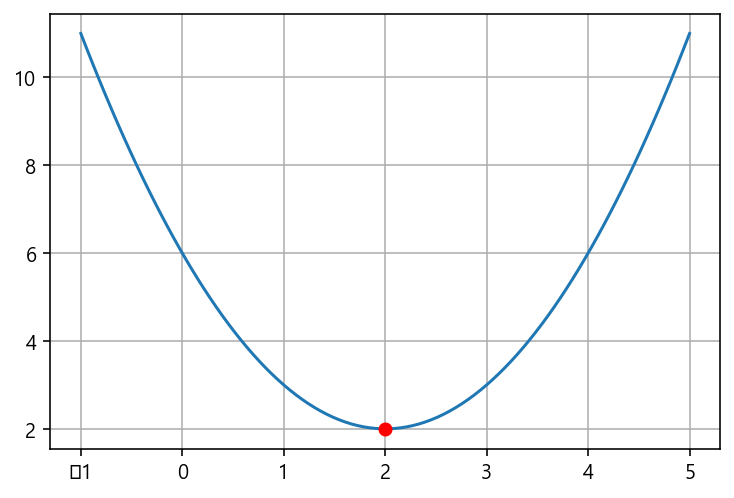

In [10]:
def f(x):
    return (x-2) ** 2 + 2
    
x = np.linspace(-1, 5, 100)
y = f(x)

plt.grid()
plt.plot(x, y)
plt.plot(2, 2, 'ro')

이렇게 목적함수의 최저점을 찾았다면 음수를 이용해 함수를 뒤집어주면 최댓값을 구하는 문제로 바뀌게 된다.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


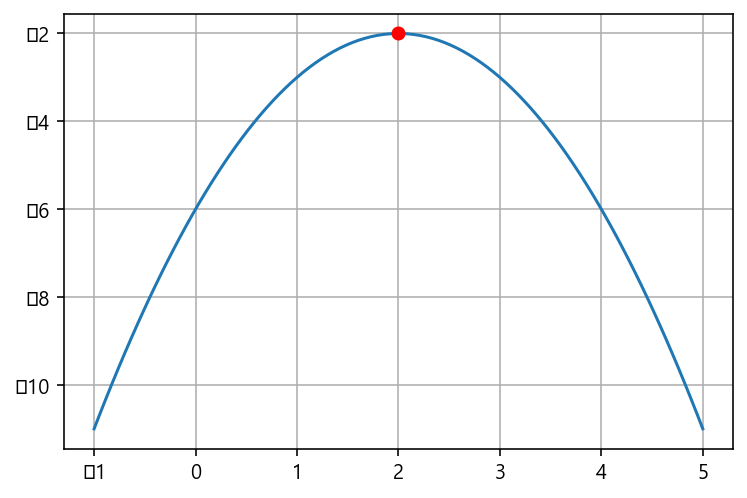

In [14]:
y2 = -f(x)

plt.grid()
plt.plot(x, y2)
plt.plot(2, -2, 'ro')

이처럼 최저점, 최고점을 구하는 $x^*$ 값을 최적화 문제의 **해**라고 한다.

앞의 설명처럼 최소화 문제를 구하면 최대화 문제를 푼 것과 같기 때문에 보통은 최소화 문제만 고려한다.

이 때 최소화 하려는 함수 $f(x)$를 목적함수, 비용함수, 손실함수, 오차함수 등으로 부르면 $J, C, L, E$등으로 표기한다.

## 예제 2차원 로젠브록함수

2차원 로젠브록 함수는 $x^*, y^* = (1, 1)$에서 최솟값을 가진다.

\begin{align}
f(x, y) = (1 − x )^2 + 100(y − x^2)^2
\end{align}

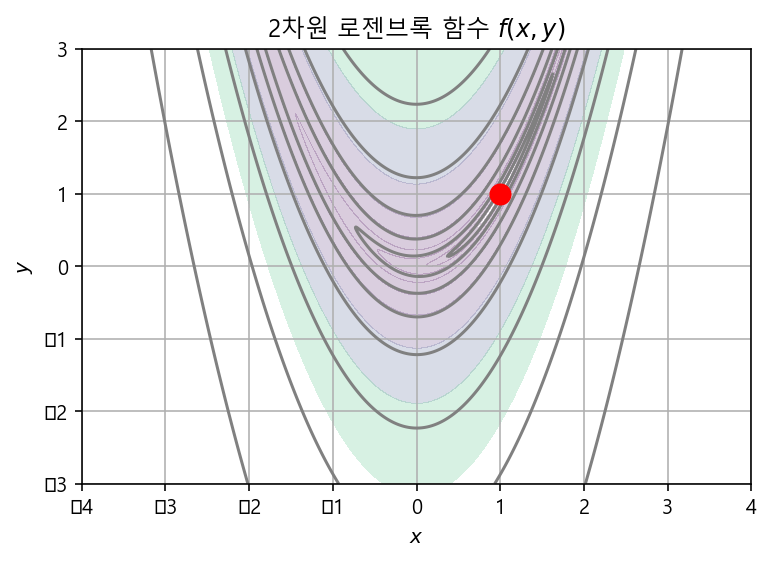

In [16]:
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels=np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=10)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("2차원 로젠브록 함수 $f(x,y)$")
plt.grid()
plt.show()

## 그리드서치와 수치적 최적화

목적함수의 값을 가장 작게 하는 $x$ 위치를 찾는 문제는 최적화 문제를 푸는것이다.

이 문제를 풀기 위한 가장 간단한 방법은 다음과 같다.

**가능한 $x$의 값을 여러 개 넣어보고 그 중 가장 작은 값을 선택한다.**

이 방법을 **그리드서치**라고 한다.

그리드 서치는 가장 직관적이고 간단하지만 수많은 $x$위치에 대해 목적함수값을 계산해야한다.

따라서 많은 시간이 소요되며 차원이 높아질수록 연산 횟수가 기하급수적으로 증가하기에 일반적으로 4차원 이상은 불가능하다는 단점이 있다.

실제로 위의 로젝브록 함수의 최소점을 구하기 위해 48만번의 함수를 계산해야한다.

이러한 단점을 극복하기 위한 방법으로 **수치적 최적화**라는 방법이 사용될 수 있다.

**수치적 최적화**란 반복적 시행 착오에 의해 최적화 필요조건을 만족하는 값 $x^*$를 찾는 방법이다.

이는 함수 위치가 최저점이 될 때까지 가능한 적은 횟수만큼 $x$를 옮기는 방법이다. 즉, 가능성이 높은 위치에 대해서만 $x$의 위치를 변경하는 방법이라 할 수있다.

수치적 최적화 방법에 필요한 두 알고리즘

1. 현재 위치 $x_k$ 가 최적점인지 판단하는 알고리즘
2. 어떤 위치 $x_k$를 시도한 뒤 다음번 시도할 위치 $x_{k+1}$을 찾는 알고리즘

## 기울기 필요조건

위의 두 알고리즘 중 현재 시도하는 위치 $x$가 최소점인지 알아내는 알고리즘에 대해 알아보자.

어떤 독립변숫값 $x^*$가 최소점이려면 다음과 같이 값 $x^*$에서 함수의 기울기와 도함수 $\dfrac{df}{dx}$의 값이 0이라는 조건을 만족해야한다. 이를 **기울기 필요조건**이라고 한다.

1. 단일변수에 대한 함수인 경우 미분값이 0이어야한다.

$\dfrac{df(x)}{dx} = 0$

2. 다변수함수인 경우 모든 변수에 대한 편미분 값이 0이어야한다.

\begin{align}
\dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_1} = 0
\end{align}

\begin{align}
\dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_2} = 0
\end{align}

$$...$$

\begin{align}
\dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_N} = 0
\end{align}

**즉, 그래디언트 벡터가 0인 것이다.**

\begin{align}
\nabla f = 0 
\end{align}

이 때, 그래디언트 벡터 $\nabla f$를 $g$로 나타내기도 한다.

$g = 0$

필요조건은 충분조건과 다르다. 왜냐하면 기울기가 0이라고 반드시 함수의 최소점이 되지 않을 수 있지만 모든 최소점은 기울기가 0이기 때문이다.

따라서 일반적인 경우 기울기를 이용해 최적점에 도달했는지 판단한다.

기울기가 0인경우 최소점이 아닌 최고점일 수 있다. 따라서 2차 도함수의 부호 또한 계산해야하는데 기울기가 0이고 2차 도함수가 양수면 최소점이 된다.

반대로 기울기가 0이고 2차 도함수가 음수면 최대점이 된다.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


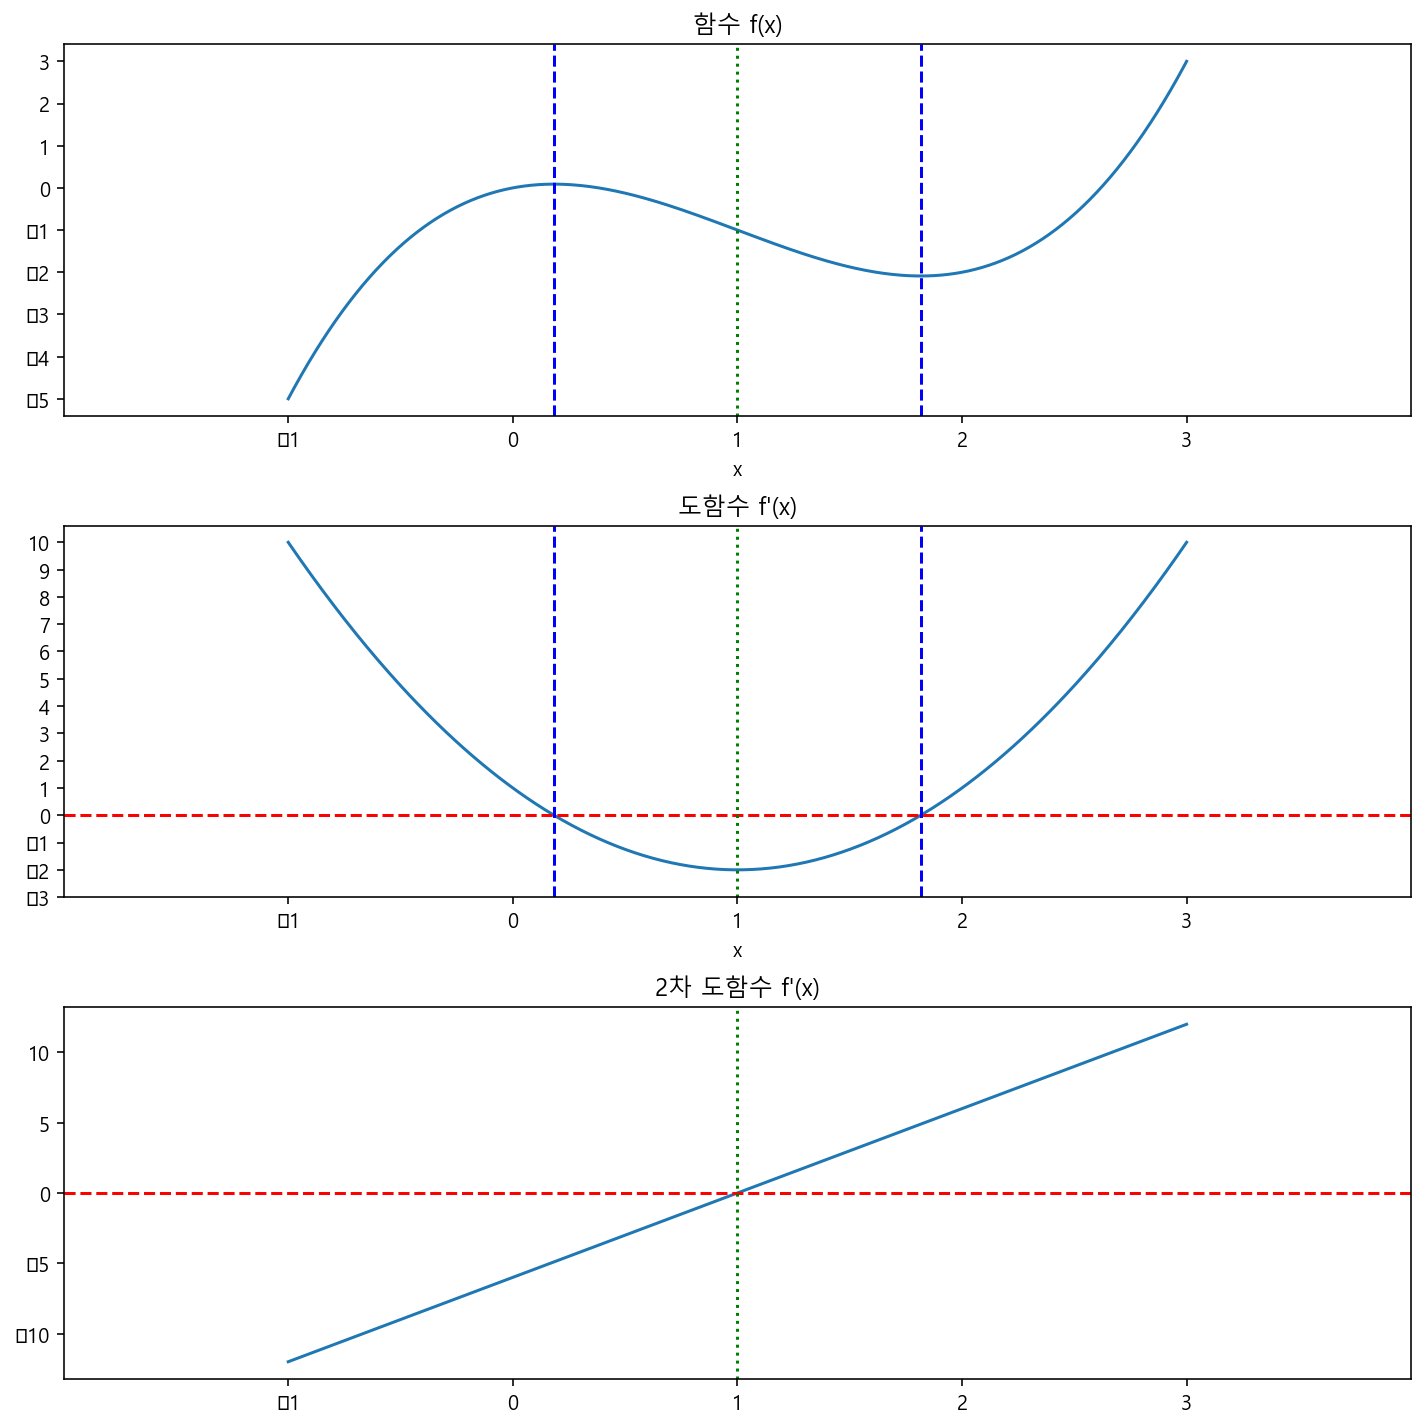

In [27]:
def f(x):
    return x**3 - 3 * x**2 + x

def fprime(x):
    return 3 * x ** 2 - 6 * x + 1

def fprime2(x):
    return 6*x - 6

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1]) 

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 10))

plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.title('함수 f(x)')
plt.xlabel('x')
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")
plt.axvline(1, c="g", ls=":")

plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.title("도함수 f'(x)")
plt.xlabel('x')
plt.axhline(0, c='r', ls="--")
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")
plt.axvline(1, c="g", ls=":")

plt.subplot(313)
plt.plot(x, fprime2(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.title("2차 도함수 f'(x)")
plt.axhline(0, c='r', ls="--")
plt.axvline(1, c="g", ls=":")

plt.tight_layout()
plt.show()


## 최대경사법

**최대경사법(Steepest Gradient Descent)**는 현재 위치 $x_k$에서의 기울기 $g(x_k)$만을 이용해 다음 위치인 $x_{k+1}$을 결정하는 방법이다.

\begin{align}
x_{k+1} = x_{k} - \mu \nabla f(x_k) = x_{k} - \mu g(x_k) 
\end{align}

먼저 아래와 같은 목적함수가 있다고 가정하자.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


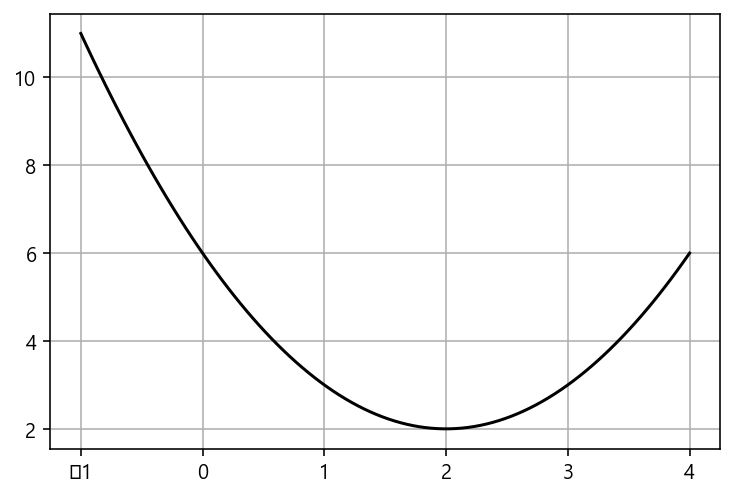

In [33]:
def f1(x):
    return (x - 2) ** 2 + 2

xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')
plt.grid()

이러한 목적함수의 도함수를 이용해 목적함수의 $x^*$위치 에서의 기울기를 구한다.

In [34]:
def f1d(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2.0)

1차시도 기울기 :  -4.0


C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


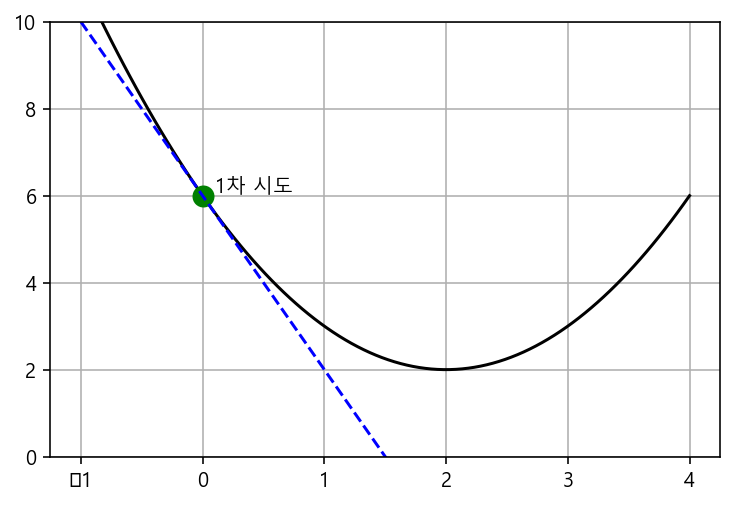

In [40]:
plt.plot(xx, f1(xx), 'k-')

x = 0
plt.grid()
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--') # 기울기
plt.ylim(0, 10)
print('1차시도 기울기 : ',f1d(x))

1차 시도 결과 기울기값이 -4로 음수이다. 따라서 곡면이 아래로 향한다는 것이고 2차시도는 더 앞으로 진행한다.

1차시도 기울기 :  -4.0
2차시도 기울기 :  -0.7999999999999998


C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


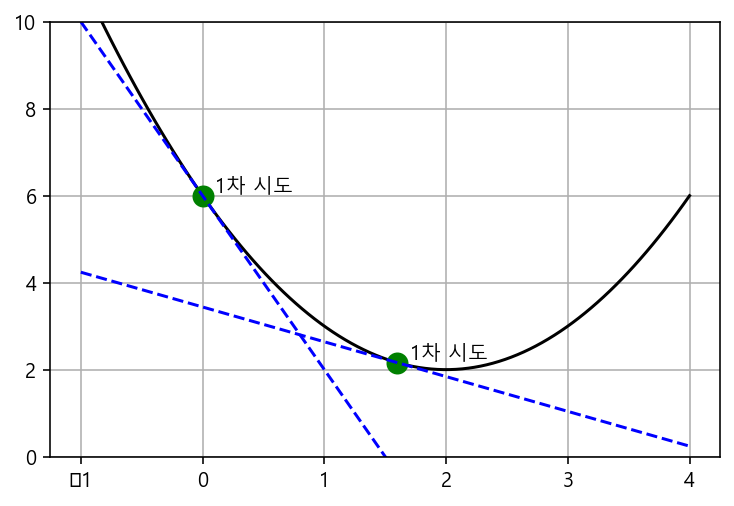

In [41]:
# step size
mu = 0.4

plt.plot(xx, f1(xx), 'k-')

x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--') # 기울기
plt.ylim(0, 10)
print('1차시도 기울기 : ',f1d(x))

# 2차시도 위치는 x값 - (mu * x위치에서의 기울기)
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--') # 기울기
print('2차시도 기울기 : ',f1d(x))
plt.grid()

mu값을 이용해 곡면의 더 낮은 점으로 이동했다. 하지만 아직 기울기 값이 음수이며 0이 아니므로 한번 더 시도한다.

1차시도 기울기 :  -4.0
2차시도 기울기 :  -0.7999999999999998
3차시도 기울기 :  -0.16000000000000014


C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


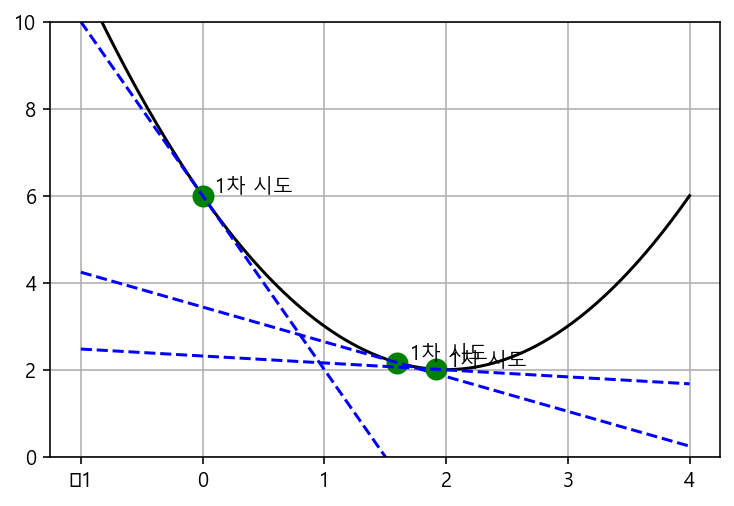

In [42]:
# step size
mu = 0.4

plt.plot(xx, f1(xx), 'k-')

x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--') # 기울기
plt.ylim(0, 10)
print('1차시도 기울기 : ',f1d(x))

# 2차시도 위치는 x값 - (mu * x위치에서의 기울기)
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--') # 기울기
print('2차시도 기울기 : ',f1d(x))

# 3차시도 위치는 x_2값 - (mu * x_2위치에서의 기울기)
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--') # 기울기
print('3차시도 기울기 : ',f1d(x))

plt.grid()

3차 시도 결과 기울기가 거의 0에 가까워졌다. 

이처럼 최대경사법을 이용해 현재 $x$위치에 대한 기울기를 계산하여 다음에 시도한 $x_{k+1}$의치를 결정할 수 있다.

## 최대경사법 - 스텝사이즈 조정

최대경사법에서 스텝사이즈를 너무 크게 지정하거나 너무 작게 지정하면 어떻게 될까?

일반적으로 스텝사이즈를 작게 지정하는 것이 좋겠으나 너무 작을 경우 최저점을 찾기까지의 시간이 너무 오래걸린다는 단점이 존재한다.

반대로 스텝사이즈가 너무 크면 다음 그림과 같이 최저점에서 오히려 멀어지는 현상이 발생할 수 있다.

1차 시도 : x = 4.40, g = 4.80
2차 시도 : x = -0.88, g = -5.76
3차 시도 : x = 5.46, g = 6.91


C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


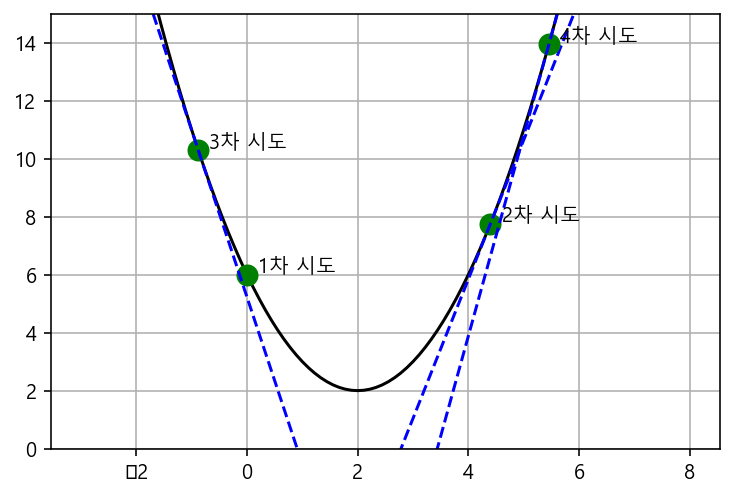

In [55]:
xx = np.linspace(-3, 8, 100)

plt.plot(xx, f1(xx), 'k-')

# step size를 너무 크게 지정한 경우
mu = 1.1

# k=0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.2, f1(x) + 0.1,'1차 시도')
for i in range(3):
    x = x - mu * f1d(x)
    plt.plot(x, f1(x), 'go', markersize=10)
    plt.text(x + 0.2, f1(x) + 0.1, str(i+2)+'차 시도')
    plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
    print(str(i+1)+'차 시도 : x = {:.2f}, g = {:.2f}'.format(x, f1d(x)))
plt.ylim(0, 15)
plt.grid()

실제로 위 그래프를 보면 오히려 최저점을 찾기위한 x값이 곡면안에서 튕겨져 나가는 모습을 확인할 수 있다.

### 예제 : 2차원 로젠브록 함수에 최대경사법 적용

먼저 목적함수를 미분해 도함수를 구하고 그래디언트 벡터를 구한다.

In [58]:
def f2g(x, y):
    """f2(x, y)의 도함수"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

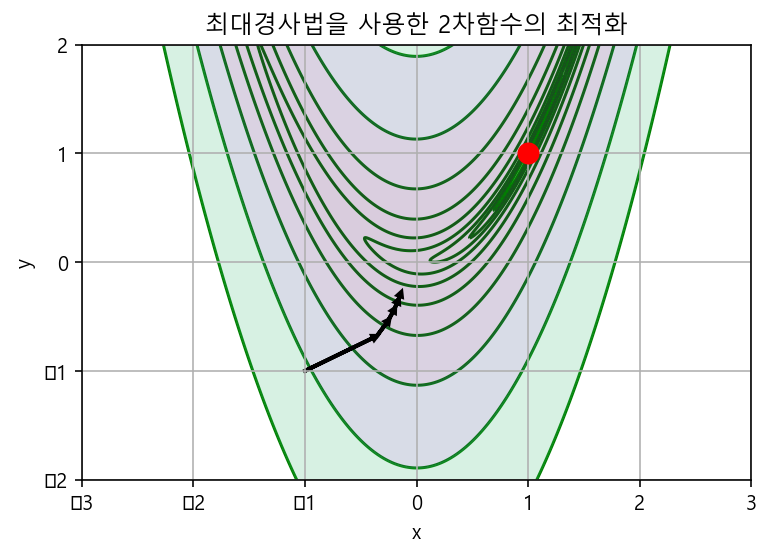

In [59]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 8e-4  # step size
s = 0.95  # for arrowhead drawing

x, y = -1, -1
for i in range(5):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xticks(np.linspace(-3, 3, 7))
plt.yticks(np.linspace(-2, 2, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화")
plt.grid()
plt.show()

최적화 결과는 시작위치, 스텝 사이즈 등에 크게 영향을 받는다.

실제로 아래의 예시를 통해 곡면의 모양이 계곡 모양인 경우 그래디언트 벡터가 최저점을 가리키고 있지 않은 경우 진동현상이 발생한다. 따라서 최적점으로 수렴하기까지 오랜 시간이 걸린다.

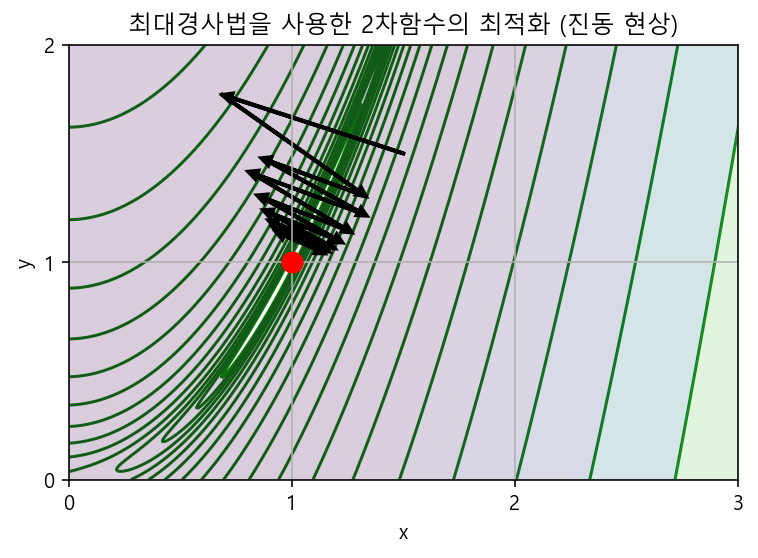

In [60]:
xx = np.linspace(0, 4, 800)
yy = np.linspace(0, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 4, 20)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 1.8e-3  # 스텝 사이즈
s = 0.95  # 화살표 크기

x, y = 1.5, 1.5
for i in range(15):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xticks(np.linspace(0, 3, 4))
plt.yticks(np.linspace(0, 2, 3))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화 (진동 현상)")
plt.grid()
plt.show()

이러한 진동현상을 없애기 위해선 2차 도함수, 즉 **헤시안행렬**을 이용하는 방법 혹은 **모멘텀 방법**등이 있다.

모멘텀 방법은 진행방향으로 계속 진행하도록 성분(모멘텀)을 추가하는 것이다. 일반적으로는 2차 도함수를 사용하고 2차도함수를 계산하기 어려운 딥러닝에서는 모멘텀 방법을 선호한다.

## 뉴턴방법

**뉴턴방법(Newton)**은 목적함수가 2차 함수라는 가정하에 한 번에 최저점을 찾는 방법이다.

그래디언트 벡터에 헤시안 행렬의 역행렬을 곱해 방향과 거리가 변형된 그래디언트 벡터를 사용한다.

\begin{align}
{x}_{n+1} = {x}_n - [{H}f({x}_n)]^{-1} \nabla f({x}_n) 
\end{align}

1. 스텝사이즈가 필요없고 목적함수가 실제로 2차함수와 비슷한 경우 빨리 수렴한다는 장점

2. 1차 도함수(그래디언트 벡터)뿐 아니라 2차 도함수(헤시안 행렬)도 필요하다는 단점

## 준 뉴턴 방법

뉴턴방법은 2차 도함수인 헤시안 행렬 함수를 사람이 미리 구현해야한다. 추가적으로 함수의 모양에 따라서 잘 수렴하지 않을 수 있기 때문에 생겨난 방법이다.

**준 뉴턴 방법**은 헤시안 행렬 함수를 사용하는 대신 현재 시도하는 $x_n$ 주변의 몇몇 점에서 함수의 값을 구하고 이를 이용해 2차 도함수의 근삿값 혹은 이에 상응하는 정보를 수치적으로 계산한다.

준 뉴턴 방법 중에서 많이 사용되는 방법은 **BFGS(Broyden-Fletcher_Goldfrab-Shanno)**방법이다.
**CG(conjugated gradient)**방법은 준 뉴턴 방법처럼 헤시안 행렬을 필요로하지 않고 변형된 그래디언트 벡터를 이용해 바로 계산한다.